# Pregunta 3

- Se hicieron 9 y 8 observaciones del peso de circuitos integrados (gramos) de dos marcas conocidas, obteniéndose:

- Marca 1	8.53	8.52	8.01	7.99	7.93	7.89	7.85	7.82	7.80
- Marca 2	7.85	7.73	7.58	7.40	7.35	7.30	7.27	7.27	

- Asumiendo que tienen distribución normal, Probar que los pesos de ambas marcas son significativamente iguales a nivel poblacional. Con un nivel de confianza del 99%.

## A.	HIPOTESIS DE INVESTIGACIÓN:

- H0: Que existe una significativa igualdad a nivel poblacional
- H1: Que NO existe una significativa igualdad a nivel poblacional

## B.	MUESTRA

- Nivel de confianza = 1 - α = 99% = 0.99
- Tamaño de muestra n = 30

## C.	SIGNIFICANCIA

- Error tipo I = α = 0.01 = 1%

## D. HIPÓTESIS ESTADÍSTICA

- Asumiendo la distribución de los datos sigue una distribución normal
- H0:  μ1 = μ2             H. Nula
- H1:  μ1 ≠ μ2             H. Alterna

In [1]:
# Importación de librerias a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats as ss

In [2]:
# Carga de los datos con numpy
marca1 = np.array([8.53, 8.52, 8.01, 7.99, 7.93, 7.89, 7.85, 7.82, 7.80])
marca2 = np.array([7.85, 7.73, 7.58, 7.40, 7.35, 7.30, 7.27, 7.27])
# Tamaño de la muestra
n1 = len(marca1)
n2 = len(marca2)
# Significancia
alpha = 0.01

print('Datos recolectados de la balanza1: ', marca1)
print('Datos recolectados de la balanza2: ', marca2)

Datos recolectados de la balanza1:  [8.53 8.52 8.01 7.99 7.93 7.89 7.85 7.82 7.8 ]
Datos recolectados de la balanza2:  [7.85 7.73 7.58 7.4  7.35 7.3  7.27 7.27]


## E. TIPO DE PRUEBA

- Sera de doble cola porque H0 tiene el signo diferente:

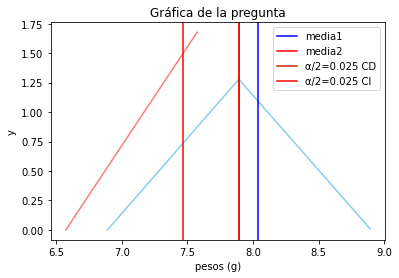

In [3]:
# Gráfica de referencia para las colas
mu1, sigma1 = np.mean(marca1), np.std(marca1)
mu2, sigma2 = np.mean(marca2), np.std(marca2)

X = ss.norm(mu1, sigma1)
Y = ss.norm(mu2, sigma2)

graph1 = np.arange(X.ppf(0.00001), X.ppf(0.99999))
graph2 = np.arange(Y.ppf(0.00001), Y.ppf(0.99999))

plt.plot(graph1, X.pdf(graph1), c='skyblue')
plt.plot(graph2, Y.pdf(graph2), c='salmon')

tail_left = int(graph1.size * 0.05) + 1
tail_right = int(graph1.size * 0.95) - 1

plt.axvline(mu1, c='blue', label='media1')
plt.axvline(mu2, c='red', label='media2')
plt.axvline(graph1[tail_right], c='#c02200', label='α/2=0.025 CD')
plt.axvline(graph1[tail_left], c='#f80000', label='α/2=0.025 CI')

plt.title('Gráfica de la pregunta')
plt.ylabel('y')
plt.xlabel('pesos (g)')

plt.legend()

## H.	ESTADISTICO DE PRUEBA

- Trata de una proporción de población, entonces mi estadistico de prueba es:

- Formula: $$z = {{(x_1 ̅ - x_2 ̅) - (\mu_1 - \mu_2)} \over { \sqrt { {s_1^2 \over n_1} + { s_2^2 \over n_2 } } }}$$

In [4]:
def test_t(x1, x2, std1, std2, n1, n2):
    
    return ((x1 - x2) - 0) / np.sqrt(std1 ** 2 / n1 + std2 ** 2 / n2)

In [5]:
data1 = {
    'marca1': marca1
}

data2 = {
    'marca2': marca2
}

data1 = pd.DataFrame(data1)
data2 = pd.DataFrame(data2)

print(data1.describe())

print(data2.describe())

         marca1
count  9.000000
mean   8.037778
std    0.285166
min    7.800000
25%    7.850000
50%    7.930000
75%    8.010000
max    8.530000
         marca2
count  8.000000
mean   7.468750
std    0.224336
min    7.270000
25%    7.292500
50%    7.375000
75%    7.617500
max    7.850000


In [6]:
# Calcular el "t" si no se conoce la desviación típica poblacional
x1 = float(data1.mean())
x2 = float(data2.mean())

std1 = float(data1.std())
std2 = float(data2.std())

n1 = len(data1)
n2 = len(data2)

t = test_t(x1, x2, std1, std2, n1, n2)
print('El estadistico de prueba "t" es:', t)

El estadistico de prueba "t" es: 4.596361843698075


In [20]:
# calculamos el p-valor por el t de prueba
p_value = ss.norm.sf(np.abs(t)) * 2
print('El p-valor es: ', p_value)

El p-valor es:  0.004632716735519003


### Podemos respaldar nuestros datos con MegaStat de Excel

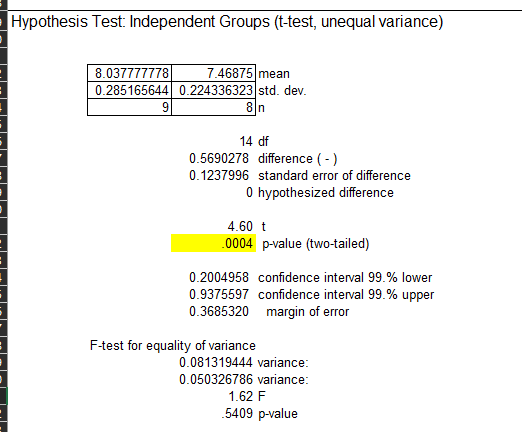

## I.	CONCLUSIÓN

- p-value < alpha
- 4.299318149041205e-06 < 0.01 (Verdadero) Rechazo la Ho

- Hay suficiente evidencia en las muestras para rechazar la hipotesis nula Que existe una significativa igualdad a nivel poblacional. A un nivel de confianza de 99%.